# ストナー-ウォルファース模型

（初版：2020年3月、更新：2023年2月21日）    

[ストナー-ウォルファース模型（Stoner–Wohlfarth model ）](https://ja.wikipedia.org/wiki/%E3%82%B9%E3%83%88%E3%83%8A%E3%83%BC-%E3%83%B4%E3%82%A9%E3%83%BC%E3%83%AB%E3%83%95%E3%82%A1%E3%83%BC%E3%83%AB%E3%83%88%E6%A8%A1%E5%9E%8B)  は、単磁区の強磁性体の磁化について広く用いられているモデルである。  
このモデルによる系のエネルギーは以下の式で与えられる。  

### 　$\displaystyle{E = KV \sin^2 (\phi - \theta) - \mu_0 M_s V H \cos\phi}$  

右辺第一項は異方性エネルギー項で、第二項はゼーマン項である。  
各パラメータは前述のリンクを参照。  

無次元化した磁場とエネルギーをそれぞれ
### 　$\displaystyle{h \equiv \frac{\mu_0 M_s H}{2K}},\quad \displaystyle{\eta \equiv \frac{E}{2KV}}$  
と定義し、$\displaystyle{\sin^2 x = \frac{1}{2}(1 - \cos 2x)}$ を用いると、  
### 　$\displaystyle{\eta = \frac{1}{4}( 1 - \cos \left[ 2(\phi - \theta) \right] - h \cos\phi}$  
となる。  

$\phi$ を変数としたエネルギー極値は  

### 　$\displaystyle{\frac{\partial\eta}{\partial \phi} = \frac{1}{2} \sin \left[ 2(\phi - \theta) \right] + h \sin\phi} = 0$  

から求められ、エネルギーの最小値は  

### 　$\displaystyle{\frac{\partial^2\eta}{\partial \phi^2} = \cos \left[ 2(\phi - \theta) \right] + h \cos\phi} > 0$  

を満たす。  

試料に対して外部磁場方向を固定（$\theta = const.$）した状態での、磁場 $h$ と磁場と磁化 $M$ の角度（$= \phi$）の関係はエネルギーミニマムから求められる。  

## 磁場 $h$ と 磁場と磁化の角度 $\phi$ の関係を図示

In [1]:
using Plots
using Plots.PlotMeasures
using Roots

In [2]:
ene(h,θ,φ) = 0.25(1-cosd(2*(φ-θ))) - h*cosd(φ) # ストナー-ウォルファース模型のエネルギー
∂ene∂φ(h,θ,φ) = 0.5*sind(2*(φ-θ)) + h*sind(φ) # φで一回微分
∂ene∂φ2(h,θ,φ) = cosd(2*(φ-θ)) + h*cosd(φ) # φで二回微分

∂ene∂φ2 (generic function with 1 method)

In [3]:
function main1(θcal)
    
    hvec1 = range(-2.0, 2.0, length=20) # 無次元化した磁場
    φvec1 = range(0.0, 360, length=20) # 磁場と磁化の角度
    A = [ene(hcal,θcal,φcal) for hcal in hvec1, φcal in φvec1]
    println("θ = ", θcal, " degree")
    
    p1 = contour(φvec1, hvec1, A, color=:lajolla, fill=true, line=false, levs=100,
            xlabel="Angle between H and M: φ (degree)", ylabel="normalized H: h")
    p2 = wireframe(φvec1, hvec1, A, camera=(20,70))
    
    return plot(p1, p2, layout=(2,1), bottom_margin = 15px, left_margin = [50px 15px 15px])
    
end

main1 (generic function with 1 method)

θ = 0 degree
θ = 45 degree
θ = 90 degree


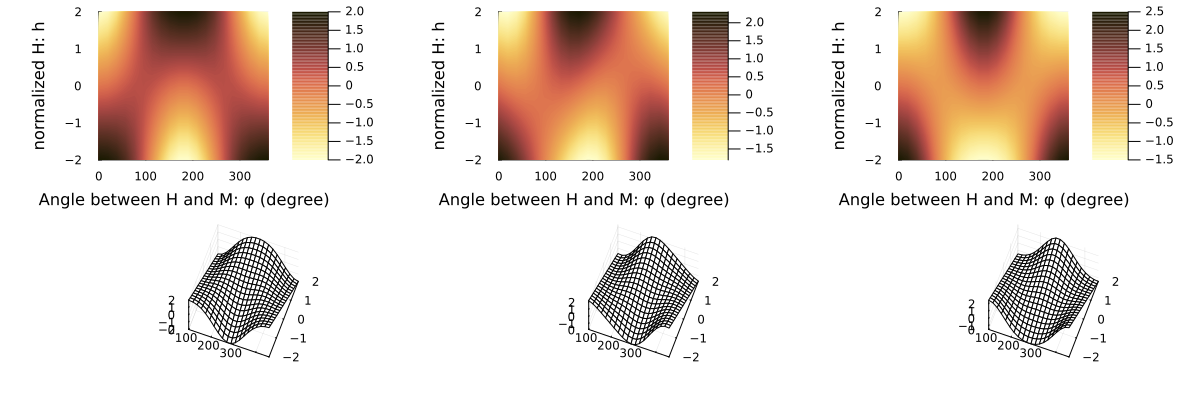

In [4]:
θcal1 =  0 # 磁場と容易軸の角度
θcal2 = 45 # 磁場と容易軸の角度
θcal3 = 90 # 磁場と容易軸の角度
plot(main1(θcal1), main1(θcal2), main1(θcal3), layout=(1,3), size=(1200,400))

## エネルギーが極小になる $\phi$ の磁場 $h$ 依存性を図示

In [5]:
function eneminsearch(θcal, hcal)
    
    f(φ) = 0.5*sind(2*(φ-θcal)) + hcal*sind(φ)
    extremalφ = find_zeros(f, 0, 360) # エネルギー極値のφ。複数点あることもある。
    eneminofφ = extremalφ[ ∂ene∂φ2.(hcal, θcal, extremalφ) .> 0] # エネルギーミニマムのφ
    enemin = ene.(hcal, θcal, eneminofφ) # エネルギーミニマム
    return eneminofφ, enemin
    
end

function φ_dep_ene(θcal)
    
    println("θ = ", θcal, " degree")
    hvec1 =  [range(-2.0, 2.0, length=18); range(2.0, -2.0, length=18)] # 無次元化した磁場
    φvec1 = range(0.0, 360.0, length=50)# 磁場と磁化の角度
    
    anim = Animation()
    for iii in eachindex(hvec1)
        eneminofφ, enemin = eneminsearch(θcal, hvec1[iii])
        enevec = ene.(hvec1[iii], θcal, φvec1)
        plt = plot(φvec1, enevec, ylims=[-2, 3], label = "h = "*"$(round(hvec1[iii]*100)/100)",
                   legend=:topright, xlabel="Angle between H and M: φ (degree)", ylabel="normalized E",
                   size=(400,300))
        plt = plot!(eneminofφ, enemin, line=false, marker=:circle, label ="Eergy minimum")
        frame(anim, plt)
    end
    return gif(anim, "ene.gif", fps = 10)
    
end

φ_dep_ene (generic function with 1 method)

θ = 0 degree


Plots.AnimatedGif("D:\\Dropbox\\Python_Julia\\Julia\\教育用\\ene.gif")
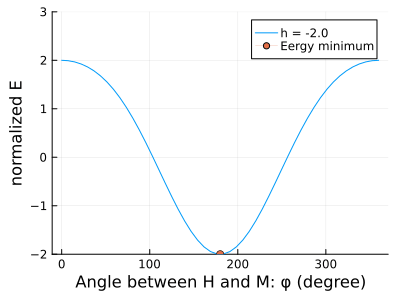

In [6]:
θcal = 0 # 磁場と容易軸の角度
φ_dep_ene(θcal)

θ = 45 degree


Plots.AnimatedGif("D:\\Dropbox\\Python_Julia\\Julia\\教育用\\ene.gif")
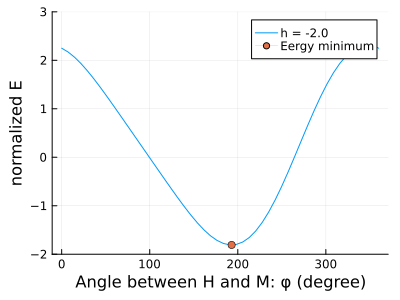

In [7]:
θcal = 45 # 磁場と容易軸の角度
φ_dep_ene(θcal)

θ = 90 degree


Plots.AnimatedGif("D:\\Dropbox\\Python_Julia\\Julia\\教育用\\ene.gif")
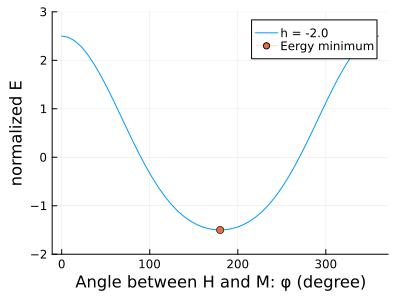

In [8]:
θcal = 90 # 磁場と容易軸の角度
φ_dep_ene(θcal)

## ヒステリシスの図示

In [9]:
function hysteresiscalc(θcal, hvec1, φvec1)
    ans = Float64[]
    for iii in eachindex(hvec1)
        eneminofφ, enemin = eneminsearch(θcal, hvec1[iii])
        if length(eneminofφ) == 1
            if length(ans) == 0
                ans = [hvec1[iii] eneminofφ[1] eneminofφ[1]]
            else
                ans = vcat(ans, [hvec1[iii] eneminofφ[1] eneminofφ[1]])
            end
        elseif length(eneminofφ) >= 2
            if length(ans) == 0
                ans = [hvec1[iii] eneminofφ[1] eneminofφ[2]]
            else
                ans = vcat(ans, [hvec1[iii] eneminofφ[1] eneminofφ[2]])
            end
        end
    end
    return ans
end

function hysplot(calcdata)
    plot(calcdata[:,1], [cosd.(calcdata[:,2]), cosd.(calcdata[:,3])],
         line=2, size=(400,300), xlims=[-2.5, 2.5], ylims=[-1.5,1.5],
         legend=:topleft, label=["H dec." "H inc."], xlabel="h", ylabel="M/Ms")
end

hysplot (generic function with 1 method)

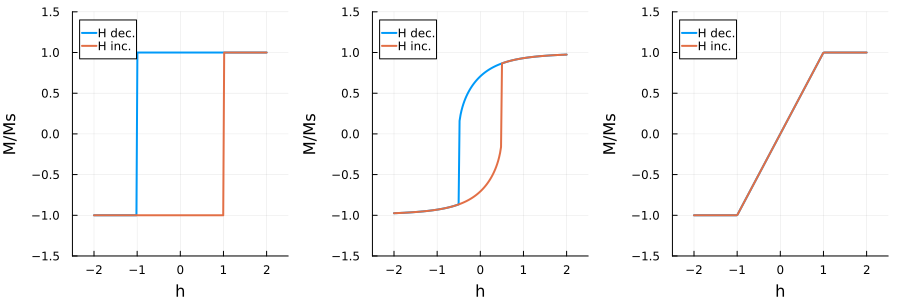

In [10]:
hvec = range(-2.0, 2.0, length=180) # 無次元化した磁場
φvec = range(0.0, 360.0, length=180) # 磁場と磁化の角度
θcal1 =  0.0
θcal2 = 45.0
θcal3 = 90.0

calc1 = hysteresiscalc(θcal1, hvec, φvec)
calc2 = hysteresiscalc(θcal2, hvec, φvec)
calc3 = hysteresiscalc(θcal3, hvec, φvec)
p1 = hysplot(calc1)
p2 = hysplot(calc2)
p3 = hysplot(calc3)
plot(p1,p2,p3, layout=(1,3), size=(900,300), bottom_margin = 15px, left_margin = [15px 15px 15px])